In [1]:
import numpy as np
import pandas as pd

In [4]:
#CRSP STOCK DATA EXPLORATION
df = pd.read_parquet("../_data/CRSP_stock_ciz.parquet")
df.head()
df.columns

Index(['permno', 'permco', 'mthcaldt', 'issuertype', 'securitytype',
       'securitysubtype', 'sharetype', 'usincflg', 'primaryexch',
       'conditionaltype', 'tradingstatusflg', 'mthret', 'mthretx', 'shrout',
       'mthprc', 'jdate'],
      dtype='object')

In [ ]:
#MktCap Exploration
df['shrout'] = df['shrout'] * 1000  # convert to actual shares
df['mktcap'] = df['mthprc'].abs() * df['shrout']
df['mktcap'].describe()

count             4698205.0
mean      2129989638.027212
std      20117018393.212234
min                 3718.75
25%              23360000.0
50%             107127020.0
75%             549655750.0
max         3785304395660.0
Name: mktcap, dtype: Float64

<Axes: title={'center': 'mktcap'}, xlabel='primaryexch'>

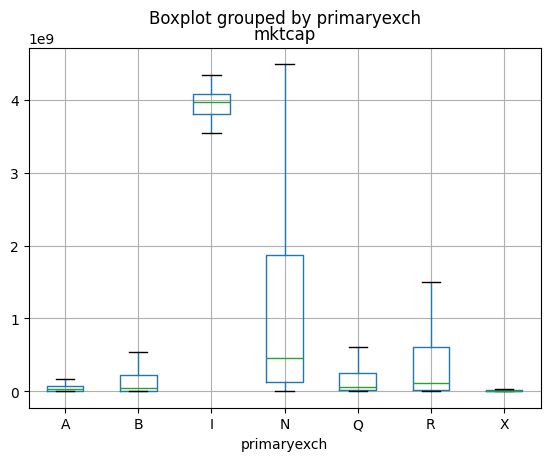

In [24]:
#MktCap by Exchange
df.boxplot(column='mktcap', by='primaryexch', showfliers=False)

<Axes: xlabel='jdate'>

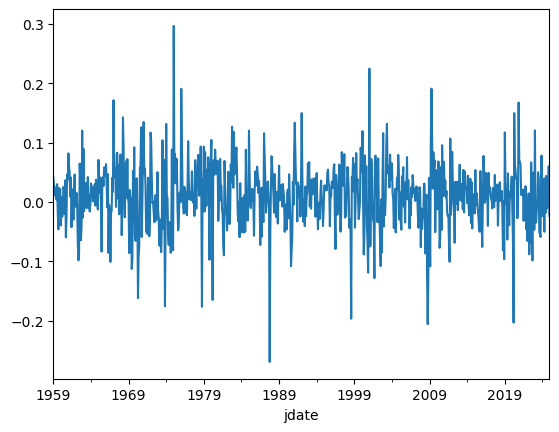

In [18]:
#Time Series of Avg Returns
df.groupby('jdate')['mthret'].mean().plot()